# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
#ваш код 
import pandas as pd
# Загружаем в переменную нашш датасет и выводим первые пять строк на экран
Advertising=pd.read_csv("Advertising.csv")
print(Advertising.shape)
Advertising.head(5)


(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
#ваш код 
# Выводим на экран сумму в каждом столбце пропущенных значений.
Advertising.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
#ваш код 
import numpy as np
# Сохраняем в переменных наши предикторы и целевую переменную
X=np.array(Advertising.drop(['Unnamed: 0','sales'],axis=1))
y=np.array(Advertising['sales'])


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
import numpy as np
# Добавляем в нашу матрицу предикторов единичный вектор для умножения матриц
#  и из вектора правильных ответов делаем двумерный массив, т.к. полученный массив предикатов будет так же двумерным.
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))


**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [6]:
# ваш код 



num_iters =1000 #количество итераций
m = X.shape[0]# количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros((n,1))#вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
   
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))
       
print('Вектор свободных коэффициентов равен', w.reshape(1,-1)) 
print('Ошибка равна', cost.round(4))       

Вектор свободных коэффициентов равен [[ 41.56217205 110.13144155  73.52860638  -0.55006384]]
Ошибка равна [2.7841]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [7]:
from sklearn.linear_model import LinearRegression
# записываем в переменную нашу модель
model = LinearRegression(fit_intercept=False)
# Обучаем ее
model.fit(X,y)
# предсказываем 
predict=model.predict(X)
from sklearn import metrics
print(f'Средняя квадратичная ошибка равна :{metrics.mean_squared_error(y,predict).round(4)}')
print('Вектор свободных коэффициентов равен:',model.coef_)

Средняя квадратичная ошибка равна :2.7841
Вектор свободных коэффициентов равен: [[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [8]:
#ваш код
X=Advertising.drop(['Unnamed: 0','sales'],axis=1)
y=Advertising['sales']

In [9]:
# через цикл маштабируем наши данные 
for i in X:
    X[i]=(X[i]-X[i].mean())/X[i].std()
X.head(5)    

,TV,radio,newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593


**Добавим единичный столбец**

In [10]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])


**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [11]:
#ваш код
#  создаем функцию
def mse_error(y,y_pred):
# Переводим вектор правильных ответов в двумерный массив, для дальнейшей работы.  
    
   y=np.array(y).reshape(len(y),1)
   n=len(y_pred)
# Подсчитываем ошибку в квадрате   
   error=(y_pred - y)**2
# Считаем средню квадратичную ошибку.   
   cost = 1/(n)*np.sum(error)
   return cost



**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [12]:
#ваш код
y_pred=np.array([y.mean().round(2) for i in range(len(y))]).reshape(len(y),1)
mse_error(y,y_pred)


np.float64(27.085749999999997)

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [13]:
#ваш код
def lin_pred(X,w):
# Умножаем матрицу предикатов на вектор свободных коэффициентов    
    y_pred = np.dot(X, w)
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [14]:
#ваш код
def stoch_grad_step(X,y,w,train_ind,eta):
    y=np.array(y).reshape(len(y),1)
    # т.к. у нас указано в задании, что должна быть выборка, задаем ее и в векторе предсказанных ответов
    y_pred=np.dot(X[:train_ind],w)
    # Задаем шаг стохастического градиентного спуска.
    direction_of_change=2* (np.dot (X[:train_ind].transpose(), (y_pred - y[:train_ind]))/ train_ind)
    # Возвращаем результат
    return w-(direction_of_change*eta)

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [15]:
# ваш код
import random
def stochastic_gradient_descent(X,y,w,eta,n_iter,l):
    # Задаем переменную бесконечно большую положительную
    distance=float('inf')
    # список ошибок, куда будем добавлять метрику.
    lst_errors=[]
    # счетчик итераций
    i=0
    # цикл согласно заданию
    while distance>=l and i<=n_iter :
        # рандомная выборка
        train_ind=np.random.randint(X.shape[0])
        # делаем предсказание 
        y_pred=lin_pred(X,w)
        # добавляем в список нашу метрику
        lst_errors.append(mse_error(y,y_pred))
        # сохраняем вектор свободных коэфф. в новую переменную
        w_new=stoch_grad_step(X,y,w,train_ind,eta)
        # считаем эвклидово расстояние между старым вектором и новым своб.коэф.
        distance=np.linalg.norm(w-w_new)
        # сохраняем в переменную наш новый вектор
        w=w_new
        # счетчик +1
        i+=1
    return w,lst_errors  

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [16]:
# Задаем наши гиперпараметры функции и запускаем ее
eta=0.5
w=np.array([1,1,1,1]).reshape(-1,1)
n_iter=10*5

w,lst_errors=stochastic_gradient_descent(X,y,w,eta,n_iter,l=0.00001)

**Постройте график зависимости ошибки от номера итерации**

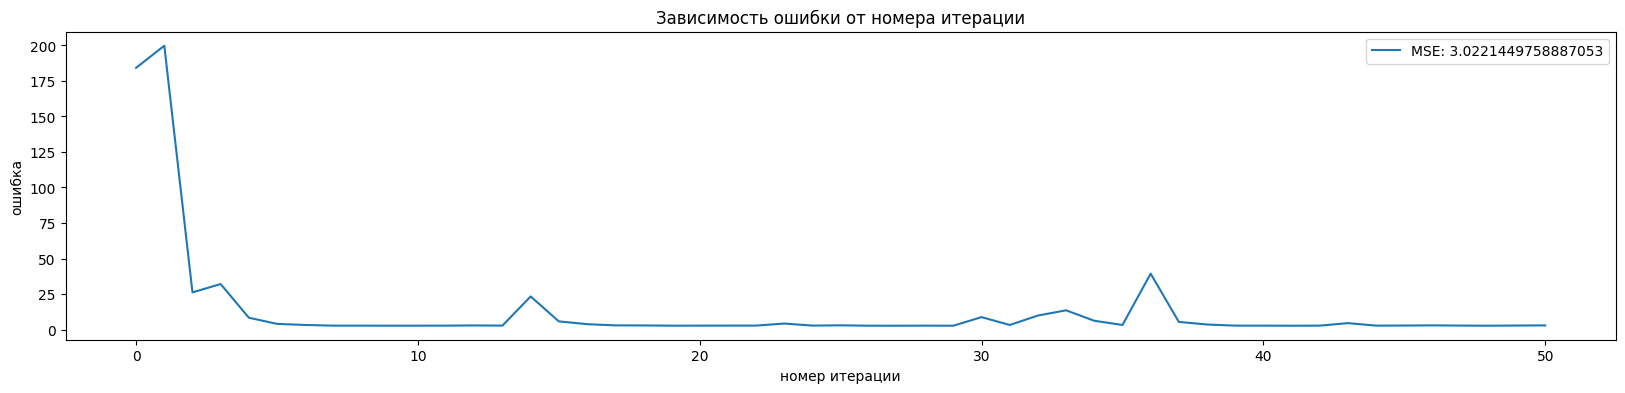

In [17]:
# ваш код
# рисуем график зависимости
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(20,4))
plt.plot(lst_errors, label=f"MSE: {lst_errors[-1]}")

ax.set_title("Зависимость ошибки от номера итерации");
ax.set_ylabel("ошибка")
ax.set_xlabel("номер итерации");
plt.legend()
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [18]:
# ваш код
print('Вектор свободных коэффициентов,к которому сошелся метод равен',w.reshape(1,-1))

Вектор свободных коэффициентов,к которому сошелся метод равен [[13.74885478  4.85330327  2.07742454 -1.21850468]]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [19]:
# ваш код
print('Среднеквадратичная ошибка на последней итерации равна',lst_errors[-1].round(4))

Среднеквадратичная ошибка на последней итерации равна 3.0221


In [19]:
age = 12
print('baby' if age <18  else " old")

baby


In [20]:
a=[1,2,3]
a.index(10)

ValueError: 10 is not in list

In [ ]:
def process(input_string: str) -> str:
    """Ваш код"""
    A=0
    B=0
    C=0
    for i in input_string:
        if i > 0:
            A+=1
        elif i == 0:
            B+=1
        elif i < 0:
            C+=1
    return A,B,C               
input_string = input()

